# Indian Pines dataset
---
Presented here is a brief run-through of some of the features of the `hypers` package using the Indian Pines (Site3) dataset. Whilst this package is geared more towards hyperspectral data from micro-spectroscopy techniques (Raman, non-linear Raman, IR), it could be useful for any hyperspectral dataset.

## Processing data

The Indian Pines dataset can be obtained from [here](https://purr.purdue.edu/publications/1947/1). `scikit-image` is used to read the .tif file as a numpy array. Note that the data has been transposed so that the format of the hyperspectral data is:

$[x, y, (z), spectrum]$

The data is then passed to the `Dataset` class.

In [8]:
import numpy as np
import hypers as hp
import matplotlib.pyplot as plt
import seaborn as sns
from skimage import io
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA

sns.set()

im = np.float64(io.imread('IndianPine_Site3.tif')).transpose()

X = hp.Dataset(im)
X.scale()
print(X)

---Dataset class---
Type: 3-dimensional hyperspectral data
Image dimension: (145, 145) | Spectral bands: 220
Scaled: True | Scaled (robust): False
Normalized: False
Preprocessing (sklearn): None
Decomposition (sklearn): None
Cluster (sklearn): None
Gaussian mixture models (sklearn): None


## Retrieving the principal components of the dataset

In [11]:
# Choosing to retrieve the first 30 principal components
ims, spcs = X.decompose(
    mdl=PCA(n_components=30, whiten=True),
    plot=False,
    return_arrs=True
)

print('Array size of the images of the principal components is', str(ims.shape))
print('Array size of the spectra of the principal components is', str(spcs.shape))

Array size of the images of the principal components is (145, 145, 30)
Array size of the spectra of the principal components is (220, 30)


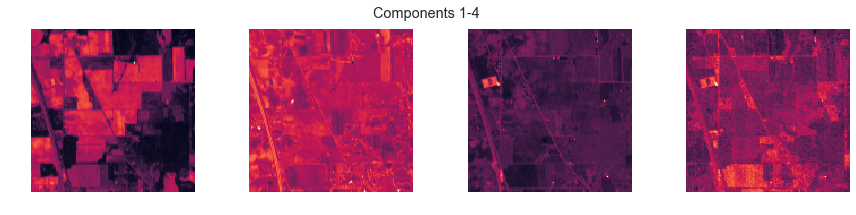

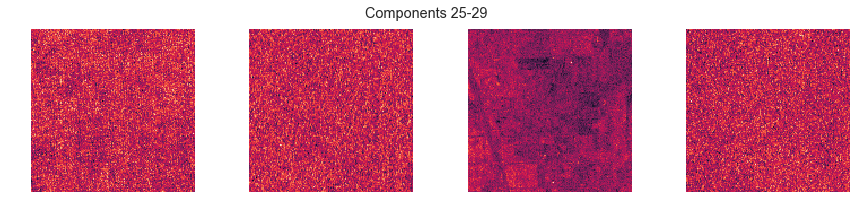

In [12]:
plt.figure(figsize=(15, 3))
for comp in range(4):
    plt.subplot(1,4,comp+1)
    plt.imshow(ims[..., comp])
    plt.axis('off')
plt.suptitle('Components 1-4')
plt.show()

plt.figure(figsize=(15, 3))
for comp in range(4):
    plt.subplot(1,4,comp+1)
    plt.imshow(ims[..., comp+25])
    plt.axis('off')
plt.suptitle('Components 25-29')
plt.show()

Components 25-29 do not seem to contain a lot of information. To view what percentage of the variance of the signal is contributed to by each principal component, it is helpful to look at the scree plot:

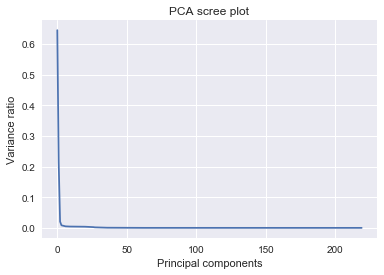

In [15]:
X.scree(plot=True, return_arrs=False)

As can be seen from the plot, only the first few principal components contribute the majority of the variance of the signal. Whilst this may not always mean that the other components are just pure noise, this is often a safe assumption.

## Clustering with K-Means

First, let's cluster the data as is without decomposing it.

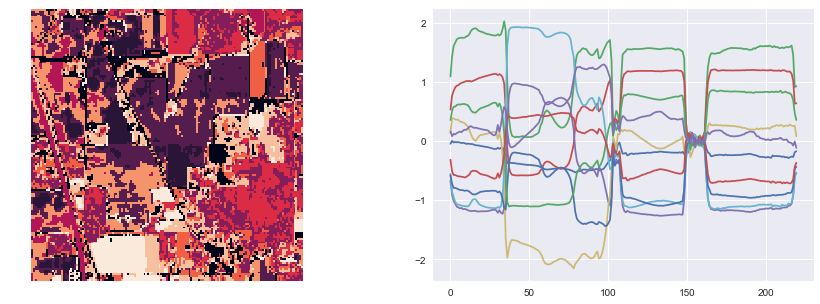

In [24]:
plt.figure(figsize=(15, 5))
X.cluster(
    mdl=KMeans(n_clusters=10),
    decomposed=False,
    plot=True,
    return_arrs=False
)

Not the best job at clustering the Indian Pines Site 3 dataset, which has 17 different known clusters (including the background). However for a dataset with a large number of clusters, k-means is far from ideal in any case. In any case, let's try clustering on only the first few principle components and use Agglomerative clustering this time.

Clustering with the first 30 PCA components.


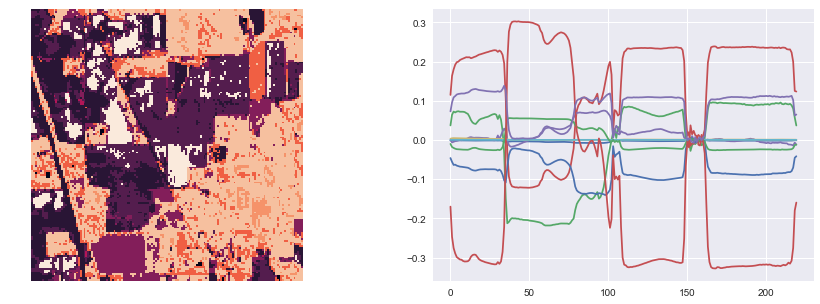

TypeError: 'NoneType' object is not iterable

In [26]:
plt.figure(figsize=(15, 5))
lbls_decomposed, spcs_decomposed = X.cluster(
    mdl=AgglomerativeClustering(n_clusters=10, linkage='complete'),
    decomposed=True,
    pca_comps=30,
    plot=True,
    return_arrs=False
)

Again, still not a great job but closer to the ground truth this time.

Hopefully this gives a quick overview of how to use the Process object model to store your hyperspectral dataset and perform clustering/decomposition directly with the object.